In [1]:
import networkx as nx

from regraph.audit import VersionedGraph
from regraph.rules import Rule
from regraph import print_graph, plot_rule, plot_graph

In [2]:
g = VersionedGraph(nx.DiGraph())

In [3]:
rule = Rule.from_transform(nx.DiGraph())
rule.inject_add_node("a")
rule.inject_add_node("b")
rule.inject_add_edge("a", "b")

/home/eugenia/anaconda3/envs/kami/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-linux-x86_64.egg/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


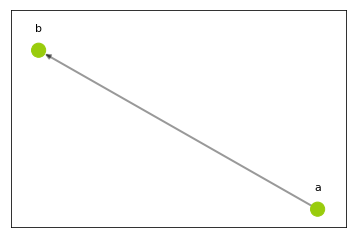

{'a': array([ 1.        , -0.35761223]),
 'b': array([-1.        ,  0.35761223])}

In [4]:
rhs_instance, _ = g.rewrite(rule, {}, message="Add a -> b")
plot_graph(g.graph)

In [5]:
branch_commit = g.branch("branch")

Left hand side
[]
[]
Preserved part
[]
[]
Right hand side
[]
[]
P->L Homomorphism : {}
P->R Homomorphism : {}

Left hand side
[]
[]
Preserved part
[]
[]
Right hand side
[]
[]
P->L Homomorphism : {}
P->R Homomorphism : {}



In [6]:
pattern = nx.DiGraph()
pattern.add_node("b")
rule = Rule.from_transform(pattern)
rule.inject_clone_node("b")

('b1', 'b1')

Left hand side
['b', 'b1']
[]
Preserved part
['b', 'b1']
[]
Right hand side
['b']
[]
P->L Homomorphism : {'b': 'b', 'b1': 'b1'}
P->R Homomorphism : {'b': 'b', 'b1': 'b'}

Left hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
Preserved part
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'a']
[('a', 'b')]
P->L Homomorphism : {'b': 'b', 'b1': 'b1', 'a': 'a'}
P->R Homomorphism : {'b': 'b', 'b1': 'b', 'a': 'a'}



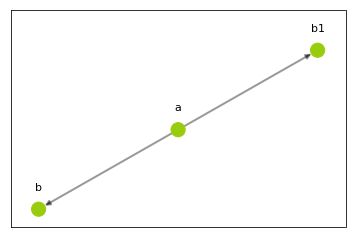

{'a': array([-2.11143180e-09, -6.68887063e-11]),
 'b': array([-1.        , -0.03167922]),
 'b1': array([1.        , 0.03167922])}

In [7]:
g.rewrite(rule, {"b": rhs_instance["b"]}, message="Clone b")
plot_graph(g.graph)

In [8]:
print(g._deltas["master"]["rule"])
print(g._deltas["master"]["lhs_instance"])

Left hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
Preserved part
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'a']
[('a', 'b')]
P->L Homomorphism : {'b': 'b', 'b1': 'b1', 'a': 'a'}
P->R Homomorphism : {'b': 'b', 'b1': 'b', 'a': 'a'}

{'b': 'b', 'b1': 'b1', 'a': 'a'}


In [9]:
g.switch_branch("master")

!!!Found clone and merge b {'b', 'b1'} {'b'}


In [10]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("c")
rule.inject_add_edge("c", "a")
rule.inject_add_edge("a", "a")

Left hand side
['a', 'c', 'b']
[('a', 'a'), ('a', 'b'), ('c', 'a')]
Preserved part
['a', 'b', 'b1']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a', 'c', 'b']
[('a', 'a'), ('a', 'b'), ('c', 'a')]
Preserved part
['a', 'b', 'b1']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b1'}



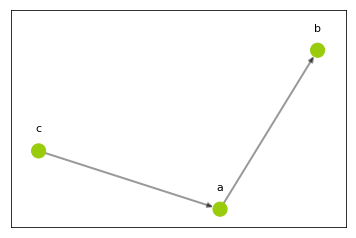

{'a': array([ 0.18217396, -0.62757666]),
 'b': array([0.81782604, 0.74993746]),
 'c': array([-1.       , -0.1223608])}

In [11]:
rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Add c and c->a")
plot_graph(g.graph)

In [12]:
g.branch("dev")

Left hand side
['a', 'c', 'b']
[('a', 'a'), ('a', 'b'), ('c', 'a')]
Preserved part
['a', 'b', 'b1']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a', 'c', 'b']
[('a', 'a'), ('a', 'b'), ('c', 'a')]
Preserved part
['a', 'b', 'b1']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
[]
[]
Preserved part
[]
[]
Right hand side
[]
[]
P->L Homomorphism : {}
P->R Homomorphism : {}

Left hand side
[]
[]
Preserved part
[]
[]
Right hand side
[]
[]
P->L Homomorphism : {}
P->R Homomorphism : {}



'e444f5cf-d97a-4914-93f9-eab1659fc581'

In [13]:
pattern = nx.DiGraph()
pattern.add_node("c")
pattern.add_node("a")
pattern.add_edge("c", "a")
rule = Rule.from_transform(pattern)
rule.inject_remove_edge("c", "a")
rule.inject_merge_nodes(["c", "a"])

'a_c'

Left hand side
['a_c', 'b']
[('a_c', 'b'), ('a_c', 'a_c')]
Preserved part
['a', 'b', 'b1']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a_c', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a_c', 'b']
[('a_c', 'b'), ('a_c', 'a_c')]
Preserved part
['a', 'b', 'b1']
[('a', 'b'), ('a', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a_c', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a_c', 'b']
[('a_c', 'b'), ('a_c', 'a_c')]
Preserved part
['c', 'a', 'b']
[('a', 'a'), ('a', 'b')]
Right hand side
['c', 'a', 'b']
[('c', 'a'), ('a', 'b'), ('a', 'a')]
P->L Homomorphism : {'c': 'a_c', 'a': 'a_c', 'b': 'b'}
P->R Homomorphism : {'c': 'c', 'a': 'a', 'b': 'b'}

Left hand side
['a_c', 'b']
[('a_c', 'b'), ('a_c', 'a_c')]
Preserved part
['c', 'a', 'b']
[('a', 'a'), ('a', 'b')]
Right hand side
['c', 'a',

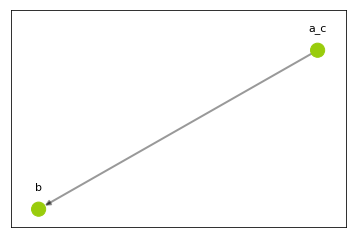

{'b': array([-0.23560335, -1.        ]),
 'a_c': array([0.23560335, 1.        ])}

In [14]:
g.rewrite(rule, {"a": rhs_instance["a"], "c": rhs_instance["c"]}, message="Merge c and a")
plot_graph(g.graph)

In [15]:
g.branches()

['master', 'branch', 'dev']

In [16]:
g.switch_branch("master")

In [17]:
g.current_branch()

'master'

In [18]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
_, rhs_clone = rule.inject_clone_node("a")

Left hand side
['a', 'a1', 'c', 'b']
[('a', 'b'), ('a', 'a'), ('a', 'a1'), ('a1', 'a'), ('a1', 'b'), ('a1', 'a1'), ('c', 'a'), ('c', 'a1')]
Preserved part
['a', 'c', 'b', 'b1', 'a1']
[('a', 'b'), ('a', 'b1'), ('a1', 'b'), ('a1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'c': 'c', 'b': 'b', 'b1': 'b', 'a1': 'a1'}
P->R Homomorphism : {'a': 'a', 'c': 'a', 'b': 'b', 'b1': 'b1', 'a1': 'a'}

Left hand side
['a', 'a1', 'c', 'b']
[('a', 'b'), ('a', 'a'), ('a', 'a1'), ('a1', 'a'), ('a1', 'b'), ('a1', 'a1'), ('c', 'a'), ('c', 'a1')]
Preserved part
['a', 'c', 'b', 'b1', 'a1']
[('a', 'b'), ('a', 'b1'), ('a1', 'b'), ('a1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'c': 'c', 'b': 'b', 'b1': 'b', 'a1': 'a1'}
P->R Homomorphism : {'a': 'a', 'c': 'a', 'b': 'b', 'b1': 'b1', 'a1': 'a'}

Left hand side
['a', 'a1', 'c', 'b']
[('a', 'b'), ('a', 'a'), ('a', 'a1'), ('a1', 'a'), ('a1', 'b'), ('a1', 'a1'

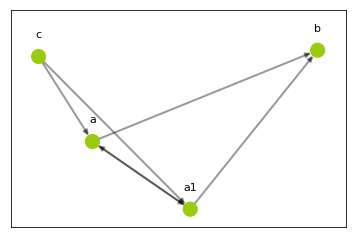

{'b': array([1.        , 0.45876017]),
 'c': array([-0.76714765,  0.4135809 ]),
 'a': array([-0.42621343, -0.1941933 ]),
 'a1': array([ 0.19336108, -0.67814778])}

In [19]:
rhs_instance, rollback_commit = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Clone a")
plot_graph(g.graph)

In [20]:
print("DELTA TO BRANCH\n\n")
print(g._deltas["branch"]["rule"])
print(g._deltas["branch"]["lhs_instance"])

DELTA TO BRANCH


Left hand side
['a', 'a1', 'c', 'b']
[('a', 'b'), ('a', 'a'), ('a', 'a1'), ('a1', 'a'), ('a1', 'b'), ('a1', 'a1'), ('c', 'a'), ('c', 'a1')]
Preserved part
['a', 'c', 'b', 'b1', 'a1']
[('a', 'b'), ('a', 'b1'), ('a1', 'b'), ('a1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'c': 'c', 'b': 'b', 'b1': 'b', 'a1': 'a1'}
P->R Homomorphism : {'a': 'a', 'c': 'a', 'b': 'b', 'b1': 'b1', 'a1': 'a'}

{'a': 'a', 'a1': 'a1', 'c': 'c', 'b': 'b'}


In [21]:
g.branch("test")

Left hand side
['a', 'a1', 'c', 'b']
[('a', 'b'), ('a', 'a'), ('a', 'a1'), ('a1', 'a'), ('a1', 'b'), ('a1', 'a1'), ('c', 'a'), ('c', 'a1')]
Preserved part
['a', 'a1', 'c', 'b', 'b1']
[('a', 'b'), ('a', 'b1'), ('a1', 'b'), ('a1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'a1': 'a1', 'c': 'c', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'a1': 'a', 'c': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a', 'a1', 'c', 'b']
[('a', 'b'), ('a', 'a'), ('a', 'a1'), ('a1', 'a'), ('a1', 'b'), ('a1', 'a1'), ('c', 'a'), ('c', 'a1')]
Preserved part
['a', 'a1', 'c', 'b', 'b1']
[('a', 'b'), ('a', 'b1'), ('a1', 'b'), ('a1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'a1': 'a1', 'c': 'c', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'a1': 'a', 'c': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a', 'a1', 'c', 'b']
[('a', 'b'), ('a', 'a'), ('a', 'a1'), ('a1', 'a'), ('a1', 'b'), ('a1', 'a1'

'9fc853f9-a839-4fc4-b0b3-71b40f1c4947'

In [22]:
print(g._deltas["master"]["rule"])

Left hand side
[]
[]
Preserved part
[]
[]
Right hand side
[]
[]
P->L Homomorphism : {}
P->R Homomorphism : {}



In [23]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("d")
rule.inject_add_edge("a", "d")

Left hand side
['a', 'd', 'a_1', 'c', 'b']
[('a', 'd'), ('a', 'a_1'), ('a', 'b'), ('a', 'a'), ('a_1', 'b'), ('a_1', 'a_1'), ('a_1', 'a'), ('c', 'a_1'), ('c', 'a')]
Preserved part
['a', 'a_1', 'c', 'b', 'b1']
[('a', 'b'), ('a', 'b1'), ('a_1', 'b'), ('a_1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'a_1': 'a_1', 'c': 'c', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'a_1': 'a', 'c': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a', 'd', 'a_1', 'c', 'b']
[('a', 'd'), ('a', 'a_1'), ('a', 'b'), ('a', 'a'), ('a_1', 'b'), ('a_1', 'a_1'), ('a_1', 'a'), ('c', 'a_1'), ('c', 'a')]
Preserved part
['a', 'a_1', 'c', 'b', 'b1']
[('a', 'b'), ('a', 'b1'), ('a_1', 'b'), ('a_1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'a': 'a', 'a_1': 'a_1', 'c': 'c', 'b': 'b', 'b1': 'b'}
P->R Homomorphism : {'a': 'a', 'a_1': 'a', 'c': 'a', 'b': 'b', 'b1': 'b1'}

Left hand side
['a', 'd', 'a_1', 'c', 'b']
[('a', 'd

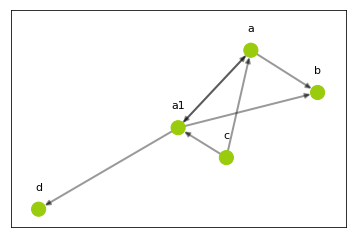

{'b': array([0.70417133, 0.10915195]),
 'c': array([ 0.14705316, -0.09415682]),
 'a': array([0.29657653, 0.24114495]),
 'a1': array([-0.14780102, -0.00089992]),
 'd': array([-1.        , -0.25524016])}

In [24]:
g.rewrite(rule, {"a": rhs_instance[rhs_clone]}, message="Add d -> clone of a")
plot_graph(g.graph)

In [25]:
print(g._deltas["master"]["rule"])

Left hand side
['a', 'd']
[('a', 'd')]
Preserved part
['a']
[]
Right hand side
['a']
[]
P->L Homomorphism : {'a': 'a'}
P->R Homomorphism : {'a': 'a'}



In [26]:
g.switch_branch("master")

In [27]:
print(g._deltas["test"]["rule"])

Left hand side
['a']
[]
Preserved part
['a']
[]
Right hand side
['a', 'd']
[('a', 'd')]
P->L Homomorphism : {'a': 'a'}
P->R Homomorphism : {'a': 'a'}



In [28]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_remove_node("a")

Left hand side
['b', 'a1', 'c']
[('a1', 'b'), ('a1', 'a1'), ('c', 'a1')]
Preserved part
['b', 'b1', 'a1', 'c']
[('a1', 'b'), ('a1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'b': 'b', 'b1': 'b', 'a1': 'a1', 'c': 'c'}
P->R Homomorphism : {'b': 'b', 'b1': 'b1', 'a1': 'a', 'c': 'a'}

Left hand side
['b', 'a1', 'c']
[('a1', 'b'), ('a1', 'a1'), ('c', 'a1')]
Preserved part
['b', 'b1', 'a1', 'c']
[('a1', 'b'), ('a1', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'b': 'b', 'b1': 'b', 'a1': 'a1', 'c': 'c'}
P->R Homomorphism : {'b': 'b', 'b1': 'b1', 'a1': 'a', 'c': 'a'}

Left hand side
['b', 'a1', 'c']
[('a1', 'b'), ('a1', 'a1'), ('c', 'a1')]
Preserved part
['b', 'a1', 'c']
[('a1', 'b'), ('a1', 'a1')]
Right hand side
['a_c', 'b']
[('a_c', 'b'), ('a_c', 'a_c')]
P->L Homomorphism : {'b': 'b', 'a1': 'a1', 'c': 'c'}
P->R Homomorphism : {'b': 'b', 'a1': 'a_c', 'c': 'a_c'}

Left hand side
['b', 'a1', 'c']
[('a1', 'b'

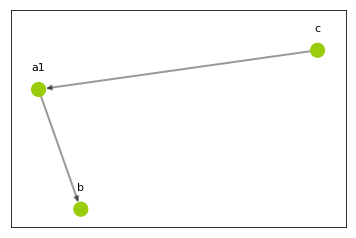

{'b': array([-0.26643117, -1.        ]),
 'c': array([0.70622716, 0.71096888]),
 'a1': array([-0.439796  ,  0.28903112])}

In [29]:
rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Remove a")
plot_graph(g.graph)

In [30]:
print(g._deltas["test"]["rule"])

Left hand side
['b', 'a1', 'c']
[]
Preserved part
['b', 'a1', 'c']
[]
Right hand side
['a', 'd', 'a_1', 'b', 'c']
[('a', 'd'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a'), ('c', 'a_1')]
P->L Homomorphism : {'b': 'b', 'a1': 'a1', 'c': 'c'}
P->R Homomorphism : {'b': 'b', 'a1': 'a', 'c': 'c'}



In [31]:
g.branches()

['master', 'branch', 'dev', 'test']

In [32]:
g.merge_with("dev")

!!!Found clone and merge a1_c {'c', 'a1'} {'a'}
Left hand side
['b', 'a1_c']
[('a1_c', 'a1_c'), ('a1_c', 'b')]
Preserved part
['b', 'b1', 'a1_c']
[('a1_c', 'b'), ('a1_c', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'b': 'b', 'b1': 'b', 'a1_c': 'a1_c'}
P->R Homomorphism : {'b': 'b', 'b1': 'b1', 'a1_c': 'a'}

Left hand side
['b', 'a1_c']
[('a1_c', 'a1_c'), ('a1_c', 'b')]
Preserved part
['b', 'b1', 'a1_c']
[('a1_c', 'b'), ('a1_c', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'b': 'b', 'b1': 'b', 'a1_c': 'a1_c'}
P->R Homomorphism : {'b': 'b', 'b1': 'b1', 'a1_c': 'a'}

!!!Found clone and merge a1_c {'c', 'a1'} {'a_c'}
Left hand side
['b', 'a1_c']
[('a1_c', 'a1_c'), ('a1_c', 'b')]
Preserved part
['b', 'a1_c']
[('a1_c', 'a1_c'), ('a1_c', 'b')]
Right hand side
['a_c', 'b']
[('a_c', 'b'), ('a_c', 'a_c')]
P->L Homomorphism : {'b': 'b', 'a1_c': 'a1_c'}
P->R Homomorphism : {'b': 'b', 'a1_c': 'a_c'}

Left hand side

'f4d250d4-164c-4e6c-83c8-89787a8cd7a0'

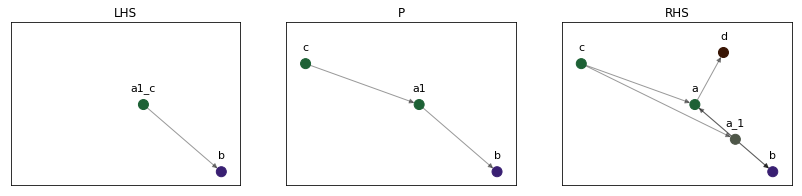

In [33]:
plot_rule(g._deltas["test"]["rule"])

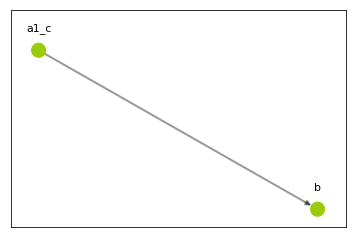

{'b': array([ 0.04360405, -1.        ]),
 'a1_c': array([-0.04360405,  1.        ])}

In [34]:
plot_graph(g.graph)

In [35]:
print(g._deltas["test"]["rule"])

Left hand side
['b', 'a1_c']
[('a1_c', 'a1_c'), ('a1_c', 'b')]
Preserved part
['b', 'a1', 'c']
[('a1', 'b'), ('a1', 'a1'), ('c', 'a1')]
Right hand side
['a', 'd', 'a_1', 'b', 'c']
[('a', 'd'), ('a', 'b'), ('a', 'a'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a'), ('c', 'a_1'), ('c', 'a')]
P->L Homomorphism : {'b': 'b', 'a1': 'a1_c', 'c': 'a1_c'}
P->R Homomorphism : {'b': 'b', 'a1': 'a', 'c': 'c'}



In [36]:
g.merge_with("test")

Left hand side
['b', 'a1_c', 'd', 'a_1']
[('a1_c', 'a1_c'), ('a1_c', 'b'), ('a1_c', 'd'), ('a1_c', 'a_1'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a1_c')]
Preserved part
['b', 'b1', 'a1_c']
[('a1_c', 'b'), ('a1_c', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'b': 'b', 'b1': 'b', 'a1_c': 'a1_c'}
P->R Homomorphism : {'b': 'b', 'b1': 'b1', 'a1_c': 'a'}

Left hand side
['b', 'a1_c', 'd', 'a_1']
[('a1_c', 'a1_c'), ('a1_c', 'b'), ('a1_c', 'd'), ('a1_c', 'a_1'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a1_c')]
Preserved part
['b', 'b1', 'a1_c']
[('a1_c', 'b'), ('a1_c', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'b': 'b', 'b1': 'b', 'a1_c': 'a1_c'}
P->R Homomorphism : {'b': 'b', 'b1': 'b1', 'a1_c': 'a'}

Left hand side
['b', 'a1_c', 'd', 'a_1']
[('a1_c', 'a1_c'), ('a1_c', 'b'), ('a1_c', 'd'), ('a1_c', 'a_1'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a1_c')]
Preserved part
['b', 'a1_c', 'a1_c1']
[('a1_c', 'b'), ('

'0bef9bdb-dd54-474f-8ec6-e377f114eaa9'

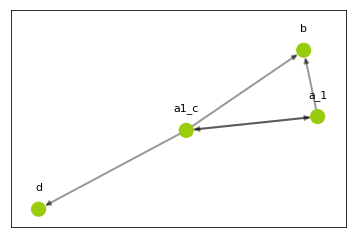

{'b': array([0.41543854, 0.92428325]),
 'a1_c': array([-0.11411314, -0.04561488]),
 'd': array([-0.77944462, -1.        ]),
 'a_1': array([0.47811923, 0.12133163])}

In [37]:
plot_graph(g.graph)

In [38]:
print("DELTA TO BRANCH\n\n")
print(g._deltas["branch"]["rule"])
print(g._deltas["branch"]["lhs_instance"])
print(g._deltas["branch"]["rhs_instance"])

DELTA TO BRANCH


Left hand side
['b', 'a1_c', 'd', 'a_1']
[('a1_c', 'a1_c'), ('a1_c', 'b'), ('a1_c', 'd'), ('a1_c', 'a_1'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a1_c')]
Preserved part
['b', 'b1', 'a1_c']
[('a1_c', 'b'), ('a1_c', 'b1')]
Right hand side
['b', 'b1', 'a']
[('a', 'b'), ('a', 'b1')]
P->L Homomorphism : {'b': 'b', 'b1': 'b', 'a1_c': 'a1_c'}
P->R Homomorphism : {'b': 'b', 'b1': 'b1', 'a1_c': 'a'}

{'b': 'b', 'a1_c': 'a1_c', 'd': 'd', 'a_1': 'a_1'}
{'b': 'b', 'b1': 'b1', 'a': 'a'}


In [39]:
g.graph.edges()

OutEdgeView([('a1_c', 'a1_c'), ('a1_c', 'b'), ('a1_c', 'd'), ('a1_c', 'a_1'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a1_c')])

In [40]:
for n in g._revision_graph.nodes():
    print(n, g._revision_graph.node[n]["branch"], g._revision_graph.node[n]["message"])

0c43ffd1-9e9b-413e-b82a-69bf6395c31f master Initial commit
90df89e0-c863-41d9-b7e0-507eedb6b940 master Add a -> b
040d6776-5413-4b4a-b109-d0ce10705ef7 branch Created branch 'branch'
88141adf-1b2b-4b5c-8564-85e483a0e483 branch Clone b
e50f1d04-da79-4069-9ca2-09392e97d707 master Add c and c->a
e444f5cf-d97a-4914-93f9-eab1659fc581 dev Created branch 'dev'
7f19ba7b-0ed3-49fe-b735-70d42f926dda dev Merge c and a
b1f9fb75-64d6-41ab-80f2-80067d742f5a master Clone a
9fc853f9-a839-4fc4-b0b3-71b40f1c4947 test Created branch 'test'
d073c0f9-1f5c-4b71-80e4-f436b6b71a16 test Add d -> clone of a
2eee2b77-d6de-4108-9dca-847e58d410de master Remove a
f4d250d4-164c-4e6c-83c8-89787a8cd7a0 master Merged branch 'dev' into 'master'
0bef9bdb-dd54-474f-8ec6-e377f114eaa9 master Merged branch 'test' into 'master'


In [41]:
g.rollback(rollback_commit)

-> Rollback rule:
Left hand side
['b', 'a1_c', 'd', 'a_1']
[('a1_c', 'a1_c'), ('a1_c', 'b'), ('a1_c', 'd'), ('a1_c', 'a_1'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a1_c')]
Preserved part
['a', 'a_1', 'b', 'c']
[('a', 'a'), ('a', 'b'), ('a_1', 'a'), ('a_1', 'a_1'), ('a_1', 'b'), ('c', 'a'), ('c', 'a_1')]
Right hand side
['a', 'a_1', 'b', 'c']
[('a', 'b'), ('a', 'a'), ('a_1', 'a_1'), ('a_1', 'b'), ('a_1', 'a'), ('c', 'a_1'), ('c', 'a')]
P->L Homomorphism : {'a': 'a1_c', 'a_1': 'a_1', 'b': 'b', 'c': 'a1_c'}
P->R Homomorphism : {'a': 'a', 'a_1': 'a_1', 'b': 'b', 'c': 'c'}



KeyError: 'a'

In [ ]:
print(g._heads)
plot_graph(g._revision_graph)
plot_graph(g.graph)

In [ ]:
print("DELTA TO BRANCH\n\n")
print(g._deltas["branch"]["rule"])
print(g._deltas["branch"]["lhs_instance"])

In [ ]:
print_graph(g.graph)

In [ ]:
g.switch_branch("branch")

In [ ]:
g.rollback(branch_commit)

In [ ]:
print(g._heads)
plot_graph(g._revision_graph)
plot_graph(g.graph)

In [ ]:
g.switch_branch("master")

In [ ]:
g.current_branch()

In [ ]:
plot_graph(g.graph)

In [ ]:
print("DELTA TO BRANCH\n\n")
print(g._deltas["branch"]["rule"])
print(g._deltas["branch"]["lhs_instance"])

In [ ]:
g.merge_with("branch")

In [ ]:
plot_graph(g.graph)

In [ ]:
from regraph.rules import _create_merging_rule

In [ ]:
print(g._deltas["branch"]["rule"])
print(g._deltas["branch"]["lhs_instance"])
print(g._deltas["branch"]["rhs_instance"])

In [ ]:
rule1, lhs1, rule2, lhs2, rhsmap = _create_merging_rule(g._deltas["branch"]["rule"], g._deltas["branch"]["lhs_instance"], g._deltas["branch"]["rhs_instance"])

In [ ]:
delta1 = g._compose_delta_path([
    "db635829-0e53-44b5-8314-19a8d7f5acc9",
    "257e8867-ec60-41f4-98af-cb82b1058446",
    "4396ac47-ad4c-4d76-8c27-5875fc1df67d"
])

In [ ]:
delta2 = g._compose_delta_path([
    "db635829-0e53-44b5-8314-19a8d7f5acc9",
    "7996b90b-f8f8-4ae0-b9e0-469f31171917"
])

In [ ]:
print(delta1["rule"])
print(delta1["lhs_instance"])
print(delta1["rhs_instance"])

In [ ]:
print(delta2["rule"])
print(delta2["lhs_instance"])
print(delta2["rhs_instance"])

In [ ]:
print(g._compose_deltas(g._invert_delta(delta2), delta1)["rule"])

In [ ]:
plot_rule(rule1)
print(rule1)
print(lhs1)
plot_rule(rule2)
print(rule2)

print(lhs2)

In [ ]:
for el in nx.bfs_tree(g.graph, "a", reverse=True).nodes():
    print(el)

In [ ]:
g = nx.DiGraph()
g.add_nodes_from(
    ["a", "a1", "c", "d", "b"]
)
g.add_edges_from([
    ("a", "a"),
    ("a", "a1"),
    ("a1", "a1"),
    ("a1", "a"),
    ("c", "a"),
    ("c", "a1"),
    ("a", "b"),
    ("a1", "b"),
    ("a1", "d")
])

In [ ]:
pattern = nx.DiGraph()
pattern.add_nodes_from(
    ["a", "a1", "c", "d", "b"]
)
pattern.add_edges_from([
    ("a", "a"),
    ("a", "a1"),
    ("a1", "a1"),
    ("c", "a"),
    ("c", "a1"),
    ("a", "b"),
    ("a1", "b"),
    ("a1", "d")
])

rule = Rule.from_transform(pattern)
rule.inject_merge_nodes(["c", "a1"])

In [ ]:
rule.refine(g, {n: n for n in rule.lhs.nodes()})

In [ ]:
print_graph(rule.lhs)